In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
# Colab 이미지 불러오기
from google.colab import files
myfile = files.upload()

Saving 김연아.png to 김연아.png


In [21]:
# P1A-Step1. e-campus에 첨부된 압축 폴더 중 [P1A]의 코드를 먼저 다운로드하세요.
# P1A-Step2. 자신이 좋아하는 연예인의 사진을 png 파일로 다운로드하세요.

I = cv2.imread('김연아.png', cv2.IMREAD_GRAYSCALE)  # 이미지를 Gray Scale로 불러오기, 여기 수정하세요. (P1A-Step3. 이미지 파일을 gray scale로 변환)
#I = cv2.imread('김연아.png', cv2.IMREAD_COLOR) # 원본 이미지를 불러오기

print(I.shape) # cv2로 읽은 이미지의 np형태 출력

(350, 420)


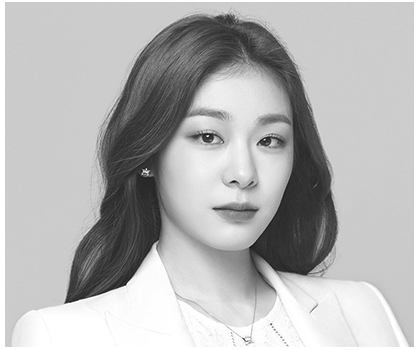

In [22]:
# cv2.imshow('image', I)     # 이미지 출력, jupyter notebook 사용자용
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# colab 사용자용 이미지 출력
from google.colab import files
from IPython import display
#display.Image('김연아.png')


from google.colab.patches import cv2_imshow # colab에서 cv2.imshow를 이용하기 위한 코드
cv2_imshow(I)

In [11]:
Intensity_level = [ 256,  32,  16,  8,  4,  2] # Intensity level 설정, 여기 수정하세요. (P1A-Step3. Intensity level을 각각 256, 32, 16, 8, 4, 2로 세팅해보세요)
step = [ np.rint(255 / (i - 1)) for i in Intensity_level ] # Intensity level별로 양자화할 step을 지정하는 코드

In [12]:
print(step)

[1.0, 8.0, 17.0, 36.0, 85.0, 255.0]


In [46]:
result_256 = np.rint(I / step[0]) * step[0]                      # Intensity level별 양자화 진행, 여기 수정하세요.
result_32 = np.rint(I /  step[1]) * step[1]                      # Intensity level별 양자화 진행, 여기 수정하세요.
# 32에서 255값을 32로 나누고 rint하고 32을 다시곱할경우 256이 되는 overflow 발생. 이를 어떻게 해결해야 하는가?
result_16 = np.rint(I / step[2]) * step[2]                     # Intensity level별 양자화 진행, 여기 수정하세요. 
result_8 = np.rint(I /  step[3]) *  step[3]                     # Intensity level별 양자화 진행, 여기 수정하세요. 
result_4 = np.rint(I /  step[4]) *  step[4]                     # Intensity level별 양자화 진행, 여기 수정하세요. 
result_2 = np.rint(I /  step[5]) *  step[5]                     # Intensity level별 양자화 진행, 여기 수정하세요. 

result_256 = result_256.astype('uint8')            # 이미지 출력을 위해서는 uint8형으로 형변환 해야함
result_32 = result_32.astype('uint8')
result_16 = result_16.astype('uint8')
result_8 = result_8.astype('uint8')
result_4 = result_4.astype('uint8')
result_2 = result_2.astype('uint8')


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


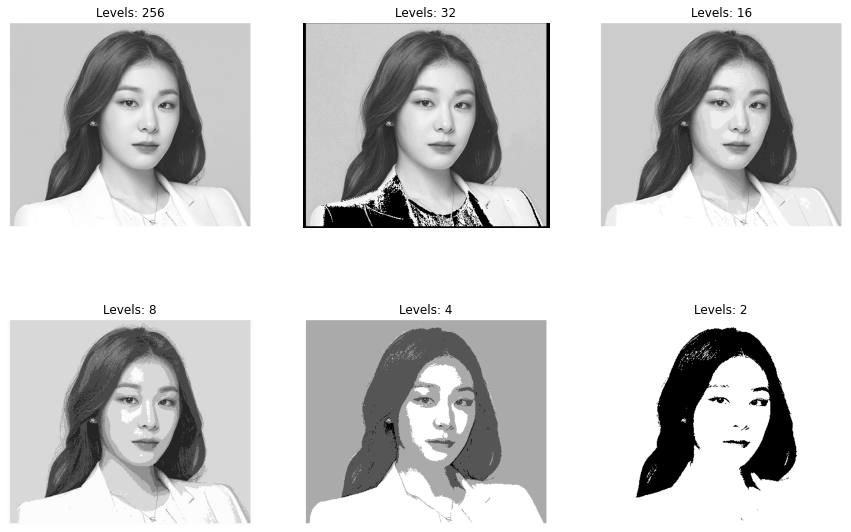

In [43]:
# plotting 하는 코드, 수정할 필요는 없습니다.
# P1A-Step4 각각의 실험 결과를 차례대로 보여주세요.
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)
result_256_RGB = cv2.cvtColor(result_256, cv2.COLOR_GRAY2RGB)      # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(result_256_RGB)
ax1.set_title('Levels: 256')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
result_32_RGB = cv2.cvtColor(result_32, cv2.COLOR_GRAY2RGB)
ax2.imshow(result_32_RGB)
ax2.set_title('Levels: 32')
ax2.axis("off")
 
ax3 = fig.add_subplot(rows, cols, 3)
result_16_RGB = cv2.cvtColor(result_16, cv2.COLOR_GRAY2RGB)
ax3.imshow(result_16_RGB)
ax3.set_title('Levels: 16')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
result_8_RGB = cv2.cvtColor(result_8, cv2.COLOR_GRAY2RGB)
ax4.imshow(result_8_RGB)
ax4.set_title('Levels: 8')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
result_4_RGB = cv2.cvtColor(result_4, cv2.COLOR_GRAY2RGB)
ax5.imshow(result_4_RGB)
ax5.set_title('Levels: 4')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
result_2_RGB = cv2.cvtColor(result_2, cv2.COLOR_GRAY2RGB)
ax6.imshow(result_2_RGB)
ax6.set_title('Levels: 2')
ax6.axis("off")

plt.show()
